In [2]:
from Solver_EDOS import RK38,np # Solver de EDOS
import matplotlib.pyplot as plt # graficar
from mpl_toolkits.mplot3d import Axes3D # ejes 3D

###
g=9.8
c_d=0.25
m=68.1

## Modelo

F= lambda t,X:np.array([X[1],0,X[3],0,-X[5],g-c_d/m*X[5]**2])
F1=lambda t,X:np.array([X[1],0,X[3],0,-X[5],g-c_d/m*abs(X[5])*X[5]])

### Con in
X0=[0,.07,0,0.7,200,-40] #x0,v0x,y0,v0y,z0,v0y

#tiempo
T=[0,12]
#par num
n=500

t,X=RK38(F,X0,T,n)
t,X1=RK38(F1,X0,T,n)

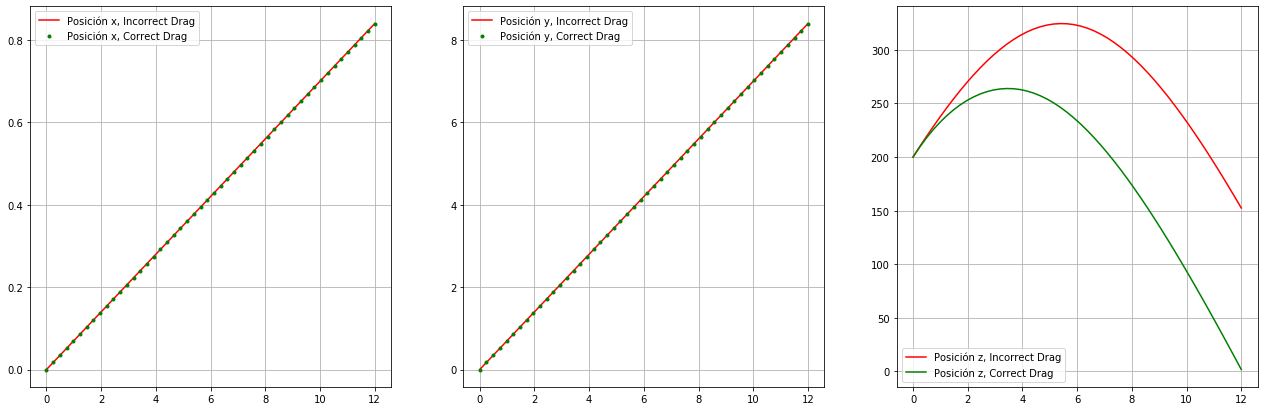

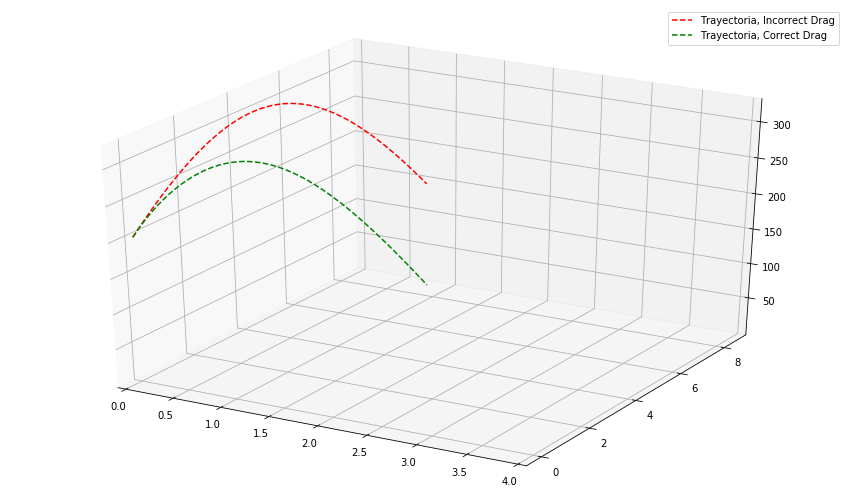

In [13]:
plt.figure(figsize=(22,7))

plt.subplot(131)
plt.plot(t,X[:,0],'r',label="Posición x, Modelo Malo")
plt.plot(t,X1[:,0],'g.',label="Posición x, Modelo Bueno")
plt.legend()
plt.grid()

plt.subplot(132)
plt.plot(t,X[:,2],'r',label="Posición y, Incorrect Drag")
plt.plot(t,X1[:,2],'g.',label="Posición y, Correct Drag")
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(t,X[:,4],'r',label="Posición z, Incorrect Drag")
plt.plot(t,X1[:,4],'g',label="Posición z, Correct Drag")
plt.grid()
plt.legend()

plt.figure(figsize=(15,9))
plt.subplot(111,projection="3d")
plt.plot(X[:,0],X[:,2],X[:,4],'r--',label="Trayectoria, Incorrect Drag")
plt.plot(X1[:,0],X1[:,2],X1[:,4],'g--',label="Trayectoria, Correct Drag")
plt.legend()
plt.xlim([0,4])
plt.grid()

plt.show()